<a href="https://colab.research.google.com/github/gustavor10silva/IC-Redes-Neurais-Artificiais/blob/main/Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

# Chapter 11 - Training Deep Neural Networks

# Vanishing/Exploding Gradients Problems

* Vanishing Gradients Problem: training never converges to a good
solution

* Exploding Gradients Problem: the algorithm diverges

## Glorot and He Initialization

* fan-in: number of inputs of the layer
* fan-out number of neurons of the layer

The connection weights of each layer must be initialized randomly as described in below equation

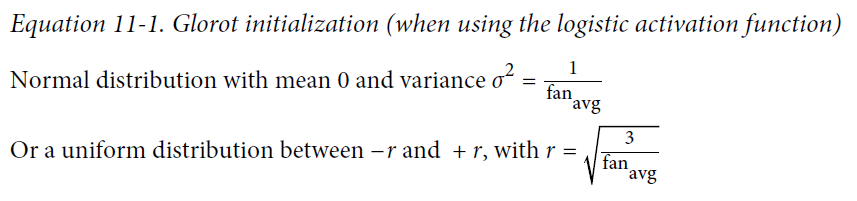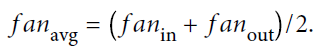

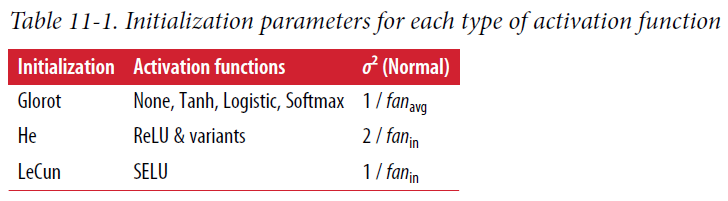

To change the kernel initializer:

In [ ]:
# keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
# or
# he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',distribution='uniform')
# keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

## Nonsaturating Activation Functions

* Sigmoid: saturate for large positive and negative values

* ReLU: don't saturate for negative values and it's fast to compute, but suffer from dying ReLUs problem

* $LeakyReLU_{\alpha}(z) = max(\alpha z, z)$: neurons never die, they can stay in a long coma, but have a chance of wake up

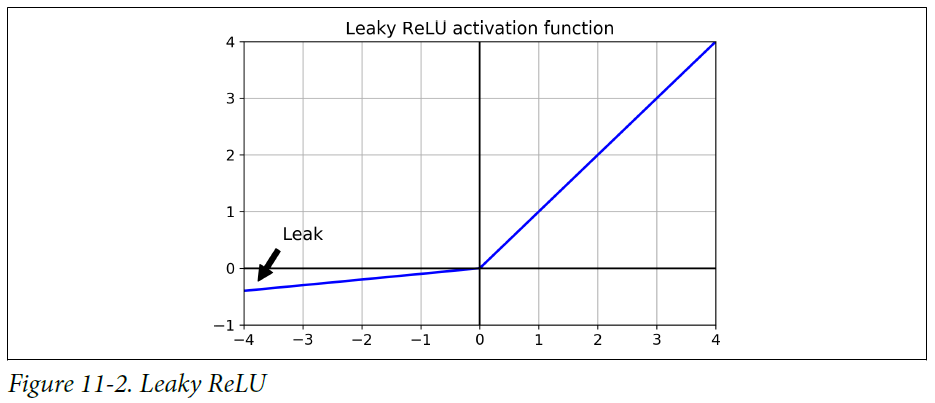

* Randomized leaky ReLU (RReLU): $\alpha$ is picked randomly in a given range during training, and it is fixed during testing

* Parametric leaky ReLU (PReLU): $\alpha$ can be learned during training; it's very good on large images dataset, but on smaller datasets it runs the risk of overfitting

* exponential linear unit (ELU): it's better than all the ReLU variants; reduce the training time and improves model performance in the test set; it takes on negative values when $z < 0$; it has a nonzero gradient for $z < 0$; if $\alpha$ is equal to 1 then the function is smooth everywhere

* if you build a neural network composed exclusively of a stack of dense layers, and if all hidden layers use the SELU (scaled ELU) activation function, then the network will self-normalize (with some conditions, see pg. 331)

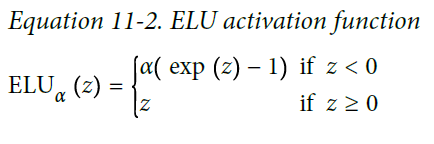

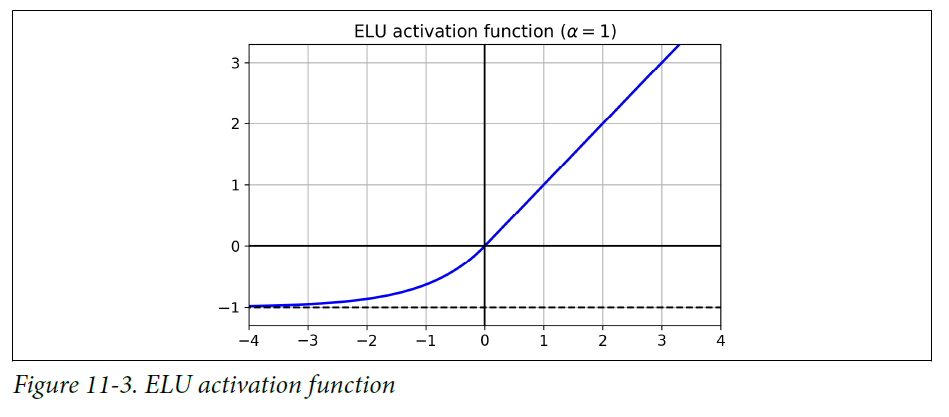

In [ ]:
# leaky ReLU activation function (or PReLU, using PReLU(alpha=0.2))
# leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
# layer = keras.layers.Dense(10, activation=leaky_relu,kernel_initializer="he_normal")

In [ ]:
# SELU activation function
# layer = keras.layers.Dense(10, activation="selu",kernel_initializer="lecun_normal")

# Reutilizando camadas pré-treinadas

## Transfer Learning (transferência de aprendizado) com Keras

Suponha que os problemas A e B são similares, onde já existem redes neurais treinadas com uma performance boa para resolver o problema A e queremos resolver o problema B. 

Em vez de iniciar o treinamento da rede B com pesos aleatórios, podemos usar as camadas inferiores da rede A para compor a rede B, acrescentando mais camadas superiores - se necessário - e a camada de saída adequada para o problema B.

Usar camadas de uma rede em outra, como nesse exemplo, é chamado de transfer learning (transferência de aprendizado)

**Exemplo:** seja o conjunto data_A, que é o fashion MNIST com 8 rótulos (todos exceto sandals e shirts), onde já existe uma rede neural model_A treinada para fazer a classificação entre essas classes. Temos o conjunto data_B, que contém os dados retirados do fashion MNIST somente para as classes sandals e shirts. Vamos construir essa situação e resolver o problema B usando o que já sabemos da rede model_A.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

## Exercício 8 - Deep Learning

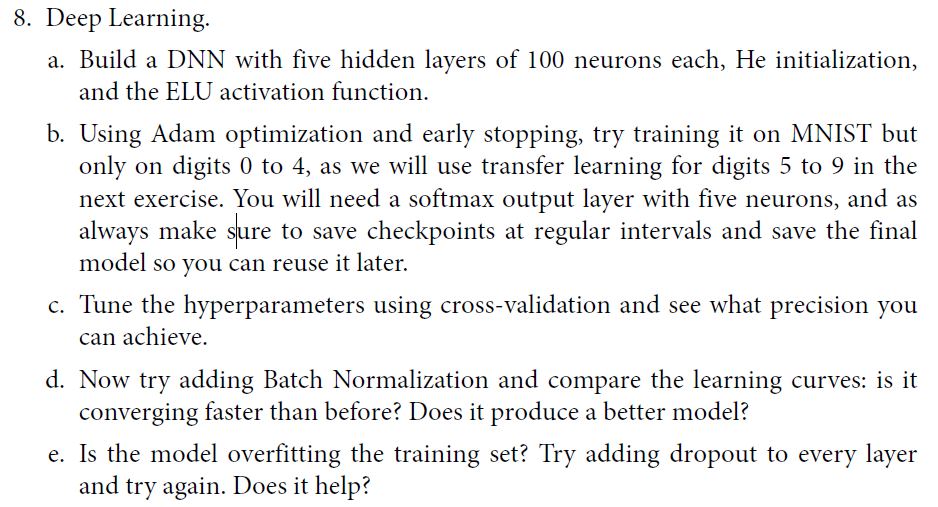

## Tradução livre:

a) Construa uma rede neural densa com cinco camadas escondidas de 100  neurônios cada, função de inicialização He e função de ativação ELU.

b) Usando a otimização Adam e o callback early stopping, tente treinar ela usando o conjunto de dados MNIST mas somente com dígitos de 0 a 4, pois usaremos transferência de aprendizado para os dígitos de 5 a 9 no próximo exercício. Você precisará de uma camada de saída com função softmax e 5 neurônios. Sempre lembre-se de salvar o modelo em intervalos regulares durante o treinamento e salvar o modelo final para poder reutilizá-lo mais tarde.

c) Tune os hiperparâmetros usando validação cruzada e veja qual é a precisão que você consegue atingir.

d) Agora tente adicionar a normalização em lote e comparar as curvas de aprendizado: estão convergindo mais rápido do que antes? Isso produz um modelo melhor?

e) O modelo está overfittando (sobreajustando) o conjunto de treino? Tente adicionar dropout em cada camada e tentar novamente. Isso ajuda?

Antes de tudo, vamos baixar o dataset MNIST:

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


Agora, vamos dar uma breve explorada na estrutura do dataset. Note, na figura abaixo, que a imagem do número 5, em $X\_train\_full[0]$ corresponde ao rótulo 5, em $y\_train\_full[0]$.

5


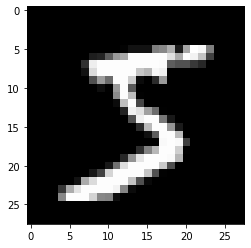

In [93]:
fig = plt.figure
plt.imshow(X_train_full[0], cmap='gray')
print(y_train_full[0])
plt.show()

O comando $X\_train\_full.shape$ retorna a dimensão da matriz $X\_train\_full$. Veja que essa matriz tem 60 mil linhas, cada linha possui uma matriz de dimensão 28x28. Podemos interpretar isso assim: imagine que cada matriz 28x28 é uma folha de papel quadrada e a matriz $X\_train\_full$ é uma pilha com 60 mil folhas desse tipo. 

In [96]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Temos 60 mil dados para treino e 10 mil para os testes:

In [94]:
len(X_train_full), len(X_test)

(60000, 10000)

## a. Construa uma rede neural densa com cinco camadas escondidas de 100  neurônios cada, função de inicialização He e função de ativação ELU.

In [72]:
from functools import partial

hidden = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(5, activation="softmax",
 kernel_initializer="glorot_uniform")
])

## b) Usando a otimização Adam e o callback early stopping, tente treinar a rede usando o conjunto de dados MNIST mas somente com dígitos de 0 a 4, pois usaremos transferência de aprendizado para os dígitos de 5 a 9 no próximo exercício. Você precisará de uma camada de saída com função softmax e 5 neurônios. Sempre lembre-se de salvar o modelo em intervalos regulares durante o treinamento e salvar o modelo final para poder reutilizá-lo mais tarde.

A seguir, vamos repartir os conjuntos de treino e de teste. Os conjuntos com índice 1 são voltados às imagens dos números de 0 a 4. Já os com índice 2 são para imagens de números de 5 a 9. Vamos dividir primeiro o conjunto de treino:

In [105]:
X1 = X_train_full[y_train_full <= 4]
y1 = y_train_full[y_train_full <= 4]
X2 = X_train_full[y_train_full > 4]
y2 = y_train_full[y_train_full > 4]

Agora vamos dividir o conjunto de teste:

In [106]:
X1_test = X_test[y_test <= 4]
y1_test = y_test[y_test <= 4]
X2_test = X_test[y_test > 4]
y2_test = y_test[y_test > 4]

In [108]:
len(X1), len(y1), len(X2), len(y2), len(X1_test), len(y1_test), len(X2_test), len(y2_test)

(30596, 30596, 29404, 29404, 5139, 5139, 4861, 4861)

Note abaixo que a relação entre $X_1$ e $y_1$ está correta, uma vez que a imagem da posição $X_1[i]$ corresponde ao número $y_1[i]$. O mesmo ocorre com $X_2$ e $y_2$.

4


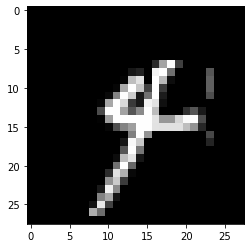

In [110]:
fig = plt.figure
plt.imshow(X1[28], cmap='gray')
print(y1[28])
plt.show()

5


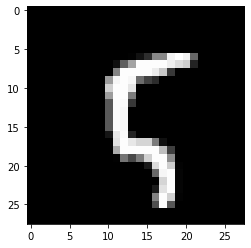

In [111]:
fig = plt.figure
plt.imshow(X2[45], cmap='gray')
print(y2[45])
plt.show()

Agora, vamos treinar a rede neural no conjunto 1, com os números de 0 a 4. Começamos dividindo o conjunto de treinamento entre treino e validação. Como a escala de cinza no conjunto original é um inteiro de 0 a 255, vamos dividir o conjunto por 255 para que essa escala fique entre 0 e 1.

In [55]:
X1_valid, X1_train = X1[:25000]/255.0, X1[25000:]/255.0
y1_valid, y1_train = y1[:25000], y1[25000:]

Como o conjunto MNIST já possui uma distribuição aleatória dos dados (com relação aos rótulos), podemos dividir os conjuntos da forma feita acima. Caso a distribuição não fosse aleatória (ex.: se os dados estiverem todos ordenados; primeiro as imagens de zeros, depois de uns, etc) teríamos que utilizar o train_test_split.

No exemplo abaixo, 30% dos dados estão sendo reservados para a validação.

In [56]:
# X1_train, X1_valid, y1_train, y1_test = train_test_split(X1_train_full, y1_train_full, test_size=0.30, random_state=42)

Agora, vamos compilar o modelo com o otimizador Adam, com $\beta_1 = 0.9$ e $\beta_2=0.999$:

In [73]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Finalmente, vamos ao treinamento do modelo no conjunto 1, com dados de 0 a 4. 

In [74]:
history = model.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 2s 9ms/step - loss: 0.3520 - accuracy: 0.8804 - val_loss: 0.1107 - val_accuracy: 0.9670
Epoch 2/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0632 - accuracy: 0.9798 - val_loss: 0.1317 - val_accuracy: 0.9600
Epoch 3/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.1078 - val_accuracy: 0.9698
Epoch 4/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0318 - accuracy: 0.9883 - val_loss: 0.1046 - val_accuracy: 0.9726
Epoch 5/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0214 - accuracy: 0.9917 - val_loss: 0.1326 - val_accuracy: 0.9661
Epoch 6/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0210 - accuracy: 0.9920 - val_loss: 0.1260 - val_accuracy: 0.9716
Epoch 7/200
175/175 [==============================] - 2s 10ms/step - loss: 0.0117 - accuracy: 0.9956 - val_loss: 0.1676 - val_accuracy: 0.961

## c) Tune os hiperparâmetros usando validação cruzada e veja qual é a precisão que você consegue atingir.

Para isso, precisamos reestruturar a rede neural, para que ela fique em forma de função, onde os argumentos serão os hiperparâmetros. Podemos fazer isso da seguinte maneira:

In [75]:
def build_model(n_hidden=5, n_neurons=100, learning_rate=1e-3, input_shape=[28,28], beta_1=0.9, beta_2=0.999):
  modelinho = keras.models.Sequential()
  modelinho.add(keras.layers.Flatten(input_shape=input_shape))
  for layer in range(n_hidden):
    modelinho.add(keras.layers.Dense(n_neurons, activation="elu"))
  modelinho.add(keras.layers.Dense(5, activation="softmax"))
  optimizer = keras.optimizers.Adam(learning_rate, beta_1, beta_2)
  modelinho.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return modelinho

Agora, rotulamos essa função como um regressor do Keras:

In [78]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

Note que podemos treinar o modelo normalmente fazendo "keras_reg.fit(...)". A vantagem é que, tendo o modelo nesse formato, podemos usar o GridSearchCV e o RandomizedSearchCV para encontrar os melhores hiperparâmetros. 

In [79]:
history2 = keras_reg.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 2s 9ms/step - loss: 0.3209 - accuracy: 0.9112 - val_loss: 0.1227 - val_accuracy: 0.9630
Epoch 2/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0828 - accuracy: 0.9734 - val_loss: 0.1277 - val_accuracy: 0.9639
Epoch 3/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0605 - accuracy: 0.9837 - val_loss: 0.1507 - val_accuracy: 0.9555
Epoch 4/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0508 - accuracy: 0.9836 - val_loss: 0.1234 - val_accuracy: 0.9671
Epoch 5/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0251 - accuracy: 0.9913 - val_loss: 0.1339 - val_accuracy: 0.9682
Epoch 6/200
175/175 [==============================] - 1s 7ms/step - loss: 0.0236 - accuracy: 0.9918 - val_loss: 0.1233 - val_accuracy: 0.9696
Epoch 7/200
175/175 [==============================] - 1s 7ms/step - loss: 0.0223 - accuracy: 0.9920 - val_loss: 0.1559 - val_accuracy: 0.9662

In [ ]:
"beta_1 = "

In [85]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [1, 2, 3],
#"n_neurons": np.arange(1, 100),
"n_neurons": [50, 100, 250, 500, 750, 1000],
"learning_rate": [3e-4, 3e-3, 3e-2, 3e-1],
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=5)
rnd_search_cv.fit(X1_train, y1_train, epochs=100,
validation_data=(X1_valid, y1_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
140/140 [==============================] - 3s 19ms/step - loss: 174.4695 - accuracy: 0.8318 - val_loss: 23.0147 - val_accuracy: 0.9452
Epoch 2/100
140/140 [==============================] - 2s 17ms/step - loss: 13.2220 - accuracy: 0.9599 - val_loss: 21.1416 - val_accuracy: 0.9484
Epoch 3/100
140/140 [==============================] - 3s 19ms/step - loss: 15.5672 - accuracy: 0.9617 - val_loss: 64.1672 - val_accuracy: 0.9300
Epoch 4/100
140/140 [==============================] - 2s 18ms/step - loss: 36.2591 - accuracy: 0.9612 - val_loss: 84.8290 - val_accuracy: 0.9518
Epoch 5/100
140/140 [==============================] - 3s 19ms/step - loss: 25.0125 - accuracy: 0.9741 - val_loss: 31.7235 - val_accuracy: 0.9620
Epoch 6/100
140/140 [==============================] - 3s 19ms/step - loss: 10.6864 - accuracy: 0.9818 - val_loss: 39.1766 - val_accuracy: 0.9600
Epoch 7/100
140/140 [==============================] - 3s 18ms/step - loss: 6.2228 - accuracy: 0.9875 - val_loss: 45.1034 -

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f23095dfad0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.0003, 0.003, 0.03,
                                                          0.3],
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': [50, 100, 250, 500, 750,
                                                      1000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [86]:
rnd_search_cv.best_params_

{'learning_rate': 0.003, 'n_hidden': 1, 'n_neurons': 500}

Feito isso, vamos construir e treinar novamente um modelo com essa estrutura. Mas, dessa vez, usando todo o conjunto de treino 

In [90]:
from functools import partial

hidden = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model3 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 hidden(500),
 hidden(5, activation="softmax",
 kernel_initializer="glorot_uniform")
])
optimizer = keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999)
model3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [91]:
history3 = model3.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 2s 12ms/step - loss: 0.2843 - accuracy: 0.9036 - val_loss: 0.1390 - val_accuracy: 0.9600
Epoch 2/200
175/175 [==============================] - 2s 10ms/step - loss: 0.0845 - accuracy: 0.9749 - val_loss: 0.1700 - val_accuracy: 0.9558
Epoch 3/200
175/175 [==============================] - 2s 10ms/step - loss: 0.0591 - accuracy: 0.9805 - val_loss: 0.1368 - val_accuracy: 0.9646
Epoch 4/200
175/175 [==============================] - 2s 10ms/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.1165 - val_accuracy: 0.9715
Epoch 5/200
175/175 [==============================] - 2s 10ms/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.1215 - val_accuracy: 0.9720
Epoch 6/200
175/175 [==============================] - 2s 10ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.1532 - val_accuracy: 0.9703
Epoch 7/200
175/175 [==============================] - 2s 10ms/step - loss: 0.0137 - accuracy: 0.9945 - val_loss: 0.1270 - val_accuracy:

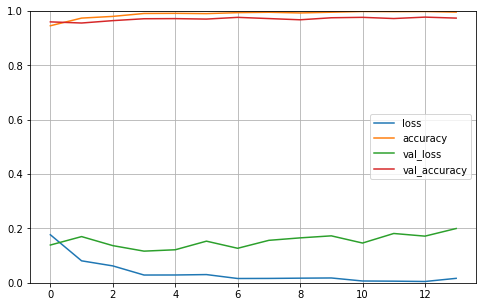

In [92]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## d) Agora tente adicionar a normalização em lote e comparar as curvas de aprendizado: estão convergindo mais rápido do que antes? Isso produz um modelo melhor?

## e) O modelo está overfittando (sobreajustando) o conjunto de treino? Tente adicionar dropout em cada camada e tentar novamente. Isso ajuda?